# BM 336027 - Technion - Medical Image Processing


## Homework 4 - Image restoration 
---

### <a style='color:red'> Due Date: 23.6.2022 </a>

### Agenda

* [Exercise 1: Wienar filter ](#Exercise-1)
* [Exercise 2: Max-Lloyd quantizer](#Exercise-2)


#### Use as many cells as you need

---
### Students Information

* Fill in


|           Name |          Id |                               email |
|----------------|-------------|------------------------------------ |
|  [Daria Hasin] | [316398551] | [daria.hasin@campus.technion.ac.il] |

### Submission Guidelines
---
* **No handwritten submissions.** 
* What you have to submit:
    * You should submit this file only, with the name: `bm_hw4_id.ipynb`.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).

In [1]:
# imports you will need
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.color import rgb2gray
from skimage.data import colorwheel as colourwheel
from typing import Tuple, List
%matplotlib inline

### **Assignment Instructions**
**In this assignment, you are allowed to use the imported functions, basic numpy its sub modules functions, matplotlib functions, and functions you implemented in other sections of the exercises (unless otherwise instructed)**

---


### Exercise 1


In this exercise you will implement and use the Wienar filter to deblur and denoise an image.   

1. Load the image 'glasses.jpg' and the filter 'glasses_filter.npy'.   
Convert the image 'glasses.jpg' for gray scale.   
'.npy' files can be loaded usint the np.load function.   
Show the original image and the image after being blurred by the given filter and having noise added to it such that its PSNR will be 100.


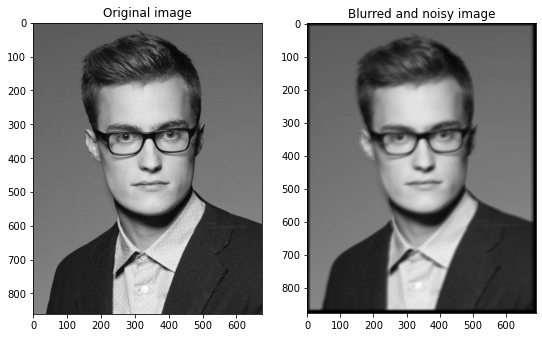

In [2]:
# ====== YOUR CODEw: ======
glasses_img = plt.imread('/Users/dariahasin/Documents/2022b/336027-IMPR/hw4/data/glasses.jpg')
glasses_filter = np.load('/Users/dariahasin/Documents/2022b/336027-IMPR/hw4/data/glasses_filter.npy')

glasses_img_gs = rgb2gray(glasses_img)
blurred_glasses = convolve2d(glasses_img_gs, glasses_filter)

wanted_pnsr = 100
i_max = np.max(blurred_glasses)
sigma = np.abs(i_max/(10**(wanted_pnsr/20)))
noise = np.random.normal(0, sigma, blurred_glasses.shape)
noisy_glasses_img = blurred_glasses + noise


plt.figure(figsize=(9,9))

plt.subplot(121)
plt.imshow(glasses_img_gs , 'gray')
plt.title('Original image')

plt.subplot(122)
plt.imshow(noisy_glasses_img , 'gray')
plt.title('Blurred and noisy image')

plt.show()
# ========================

2. Implement the `wiener_filter` function that recieves a blurry and noisy image, a filter kernel and a prior array and returns the restored image.<br>
The prior array is the belived signal to noise ratio of the Fourier transforms of the original image $(I)$ and noise $(N)$. The prior array will be what we believe is the ratio $\frac{N}{I}$.<br>
Don't forget to set the s parameter in the fft function. 

In [3]:
def wiener_filter(img: np.ndarray, kernel: np.ndarray, prior: np.ndarray) -> np.ndarray:
    '''
     
    The function recieves a blurry and noisy image, a filter kernel and a prior array in the Fourier domain
    and returns the restored image.
    
    :param img: numpy array of a blurry and noisy image.
    :param kernel: numpy array of a filter kernel.
    :param prior: numpy array of the ratio between the noise and the image in the Fourier domain (N/I).
    :return img_restored: numpy array of an restored image from a blurry and noisy image.
    '''
    # ====== YOUR CODE: ======
    img_cp = np.copy(img)
    img_fourier = np.fft.fft2(img_cp)
    kernel_fourier = np.fft.fft2(kernel, s=img.shape)
    
    w = np.conjugate(kernel_fourier) / (np.abs(kernel_fourier)**2 + np.abs(prior)**2)
    img_restored = np.abs(np.fft.ifft2(w*img_fourier))
    # ======================== 
    return img_restored

3. Use your `wiener_filter` function on the blurred and noisy image you created to restore it using the power law as a prior on the magnitude of the image in the Fourier domain. 
$$ \left|I(u, v)\right|=\frac{I_0}{\sqrt{u^2+v^2}} $$
$$ \left|N(u, v)\right|= N_0$$
Where $N_0$ is some constant that is dependent on the magnitude of the noise. 
And $I_0$ is a constant that is dependent on the magnitude of the image.
$u$ and $v$ are frequencies.
Your prior, therefore, will be $$ K_0\cdot\sqrt{u^2+v^2} $$
Show your results of using your implementation of the Wiener filter on the blurred and noisy image with two different value of $K_0$ (try to get resonable results).    
Compare those results to those you get when you use the same regulerization value for all frequencies (not dependent on $u$ and $v$). You may look for another regulerization constant.   
Show the noisy image and the images you get after your tries of restoration for each prior.


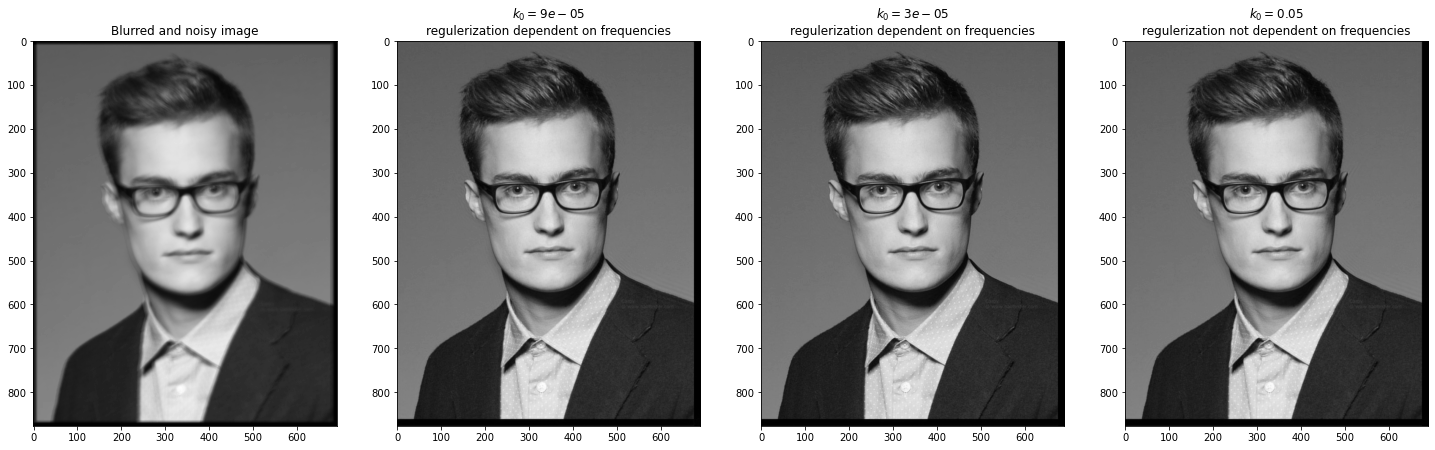

In [4]:
# ====== YOUR CODE: ======
def get_prior(k0, img, with_coords=True):
    prior = np.zeros_like(noisy_glasses_img)
    if with_coords:
        for i in range(prior.shape[0]):
            for j in range(prior.shape[1]):
                prior[i, j] = k0*np.sqrt(i**2 + j**2)
    else:
        prior=k0*np.ones_like(noisy_glasses_img)
    return prior


k0_1 = 0.00009
prior1=get_prior(k0_1, noisy_glasses_img)
res_img1 = wiener_filter(noisy_glasses_img, glasses_filter, prior1)

k0_2 = 0.00003
prior2=get_prior(k0_2, noisy_glasses_img)
res_img2 = wiener_filter(noisy_glasses_img, glasses_filter, prior2)

k0_3 = 0.05
prior3=get_prior(k0_3, noisy_glasses_img, with_coords=False)
res_img3 = wiener_filter(noisy_glasses_img, glasses_filter, prior3)

plt.figure(figsize=(25,25))
plt.subplot(141)
plt.imshow(noisy_glasses_img , 'gray')
plt.title('Blurred and noisy image')

plt.subplot(142)
plt.imshow(res_img1, 'gray')
plt.title(f'$k_0={k0_1}$\nregulerization dependent on frequencies')

plt.subplot(143)
plt.imshow(res_img2, 'gray')
plt.title(f'$k_0={k0_2}$\nregulerization dependent on frequencies')

plt.subplot(144)
plt.imshow(res_img3, 'gray')
plt.title(f'$k_0={k0_3}$\nregulerization not dependent on frequencies')

plt.show()
# ========================

4. Repeat the last instructions for the image after being blurred by the given filter and having noise added to it such that its PSNR will be 10. 

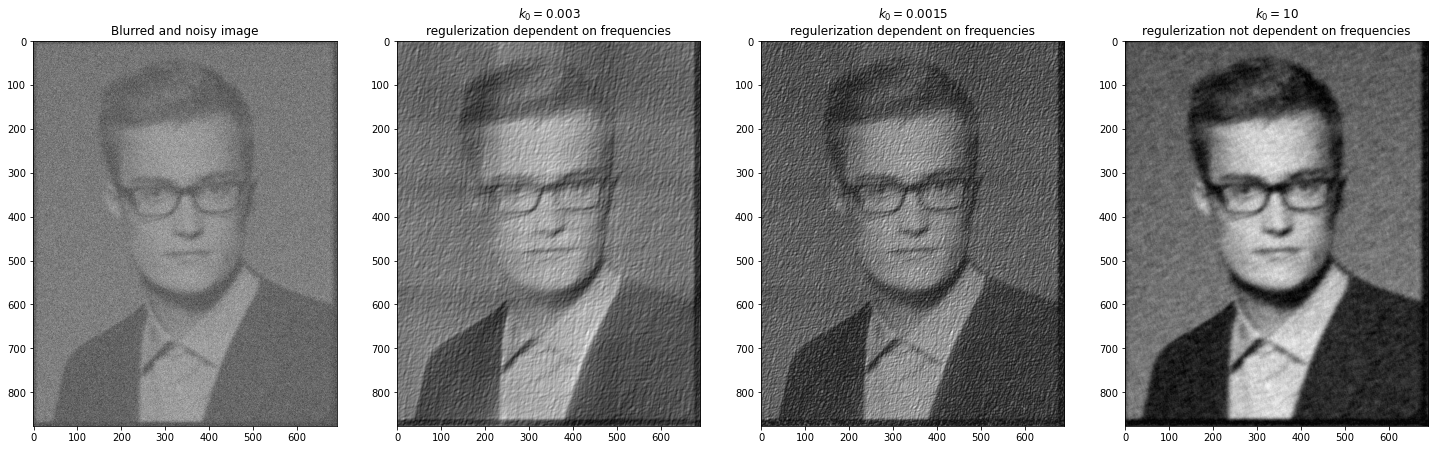

In [5]:
# ====== YOUR CODE: ======
wanted_pnsr = 10
i_max = np.max(blurred_glasses)
sigma = np.abs(i_max/(10**(wanted_pnsr/20)))
noise = np.random.normal(0, sigma, blurred_glasses.shape)
noisy_glasses_img10 = blurred_glasses + noise

k0_1 = 0.003
prior1=get_prior(k0_1, noisy_glasses_img10)
res_img1 = wiener_filter(noisy_glasses_img10, glasses_filter, prior1)

k0_2 = 0.0015
prior2=get_prior(k0_2, noisy_glasses_img10)
res_img2 = wiener_filter(noisy_glasses_img10, glasses_filter, prior2)

k0_3 = 10
prior3=get_prior(k0_3, noisy_glasses_img10, with_coords=False)
res_img3 = wiener_filter(noisy_glasses_img10, glasses_filter, prior3)

plt.figure(figsize=(25,25))
plt.subplot(141)
plt.imshow(noisy_glasses_img10 , 'gray')
plt.title('Blurred and noisy image')

plt.subplot(142)
plt.imshow(res_img1, 'gray')
plt.title(f'$k_0={k0_1}$\nregulerization dependent on frequencies')

plt.subplot(143)
plt.imshow(res_img2, 'gray')
plt.title(f'$k_0={k0_2}$\nregulerization dependent on frequencies')

plt.subplot(144)
plt.imshow(res_img3, 'gray')
plt.title(f'$k_0={k0_3}$\nregulerization not dependent on frequencies')

plt.show()
# ========================

###  Exercise 2



In this exercise, you will Implement the Max-Lloyed algorithm for quantization of pixel values of an RGB image. 

Given a set of quantization levels $\left\{f_i^{(k)}\right\}$, we want to find a better set of quantization levels $\left\{f_i^{(k+1)}\right\}$. Finding and representing the borders of the quantization regions is hard in any dimension higher than 1D, therefore, instead of finding the decision levels, you will use the euclidean distance of each pixel value in the 3D RGB space for the quantization levels. A pixel value " belongs" to the quantization level closest to it. Next, find the new quantization levels by computing the mean pixel value belonging to each previous quantization level.      

1. Implement the function `max_lloyd_iter` that receives the image and a set of quantization levels and returns the next set of quantization levels. The quantization levels you are looking for are 3-dimensional vectors. Do not perform quantization for each color channel separately.  
Note: you can infer the dimension by assuming a 'channel last' convention. 

Write a description of your function and explain its inputs and output.   



In [6]:
def max_lloyd_iter(img: np.ndarray, prev_levels: np.ndarray) -> np.ndarray:
    '''
     
    Add your description and complete the inputs (params) and output (return).
    
    :param img: 
    :param prev_levels:
    :return new_levels:
    '''
    # ====== YOUR CODE: ======

    
    # ========================   
    return new_levels

To perform quantization, you have to initialize the quantization levels to some guess and iteratively improve that initial guess. You stop improving your quantization levels when a criterion you chose is met.<br>

2. Implement the function `max_lloyd_quantize` that receives an image and a number of quantization levels, performs Max-Lloyd quantization, and returns the quantization levels and your metric values at each iteration.   
To ensure your algorithm does not run for too long, if your threshold is too low, use the 'max_iter' parameter to stop your function prematurely. The input and output data types have to be uint8.  
Write a description of your function and explain its inputs and output.


In [7]:
def max_lloyd_quantize(img: np.ndarray, level_num: int, threshold: float, max_iter: int) -> Tuple[np.ndarray, np.ndarray]:
    '''
     
    Add your description and complete the inputs (params) and output (return).
    
    :param img: 
    :param level_num:
    :param threshold:
    :param max_iter:
    :return new_levels:
    :return metric_vals:
    '''
    # ====== YOUR CODE: ======

    
    
    # ======================== 
    
    return new_levels, metric_vals

Run the cell below:

In [8]:
np.random.seed(83)
image = np.random.randint(0, 233, (2, 2, 3))
quant_levels, metric = max_lloyd_quantize(image, 4, threshold = 0.1, max_iter = 20)

NameError: name 'new_levels' is not defined

3. Did you run into errors when trying to run the above cell?    
What caused these errors?  
How do you think you can solve the issue causing these errors to rise?   

**Answer:**

4. Go back to your implementation of the function `max_lloyd_quantize` and change the initializaiton strategy from choosing random points in the RGB space to choosing random values from the image pixels (3D vectors) as initial quantization levels.<br>
Implement the function `init_levels` that receives an image and a number of quantization levels (K) and returns a random choice of pixels vaules that can be used as initial quantization levels (a Kx3 array).<br>
Make sure you do not use the same pixel value twice.<br>
A usefull function: np.unique<br>
Write a description of your function and explain its inputs and output.<br>


In [ ]:
def init_levels(img: np.ndarray, level_num: int,) -> np.ndarray:
    '''
    Add your description and complete the inputs (params) and output (return).
    
    :param img: 
    :param level_num:
    :return init_vals:
            
    '''
    # ====== YOUR CODE: ======

    
    # ========================    
    return init_vals

5. Why is it important to make sure you do not use the same quantization level twice? what will happen if you do use the same quantization level twice?  

**Answer:**

6. Implement the function `quantize` the receives an image and quantization levels and creates a quantized version of the image.<br> 
Write a description of your function and explain its inputs and output.<br>


In [ ]:
def quantize(img: np.ndarray, qunt_levels: np.ndarray,) -> np.ndarray:
    '''
    Add your description and complete the inputs (params) and output (return).
    
    :param img: 
    :param qunt_levels:
    :return qunt_img:
    '''
    # ====== YOUR CODE: ======

    
    # ========================  
    return qunt_img

7. Use your functions on the images 'colourwheel'.   
Show the images along side their quantized versions (4, 8, 16 and 32 colors) and the progression of their metric. Show the threshold in the plot with the progression of the metric as a line parallel to the iterations' axis.   
Add titles to your plots.   

In [ ]:
# ====== YOUR CODE: ======



# ========================

8. Use your function on the the image 'gray_lena.jpg' before and after adding random Gaussian noise with a std of half the difference between the quantization levels to it.
Show the original clean image along with its quantized version (2 colors) and the quantized version of the noisy image.   
Add titles to your plots.   


In [ ]:
# ====== YOUR CODE: ======



# ========================

9. Which of the images looks better to you? Comment on the egde preservation and the number of perceived colors. 

**Answer:**